Code fournit dans le fichier d'instructions qui affiche le graphique de Power Spectral Density d'environ 1 million d'échantillons. :)

[0.00000000e+00 9.76562595e-07 1.95312519e-06 ... 9.99999805e+00
 9.99999902e+00 1.00000000e+01]


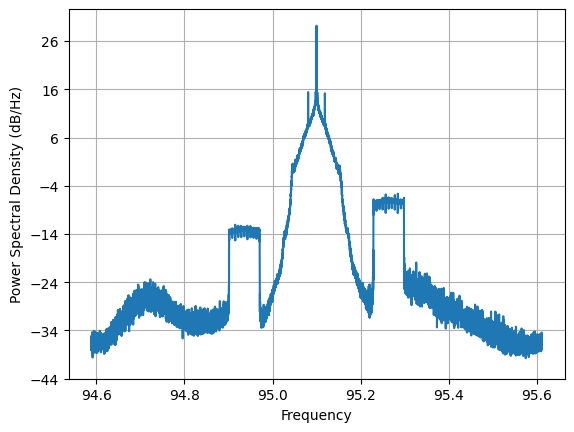

In [16]:
# paramètres globaux
RATE = 1024000
FREQ = 95100000
# importer la librairie du module SDR
from rtlsdr import RtlSdr
import wavio
import numpy as np

temps=np.linspace(0,10,10*RATE)

print(temps)

# créer un objet connecté au module SDR
sdr = RtlSdr()
sdr.sample_rate = RATE
sdr.center_freq = FREQ
sdr.gain = 'auto'
# enregistrer des échantillons I/Q en nombres complexes
samples = sdr.read_samples(RATE*10)
sdr.close()
# graphique de la densité spectrale de puissance
import matplotlib.pyplot as plt
# psd = Power Spectral Density
plt.psd(samples, NFFT=2 ** 14, Fs=RATE / 1e6, Fc=FREQ / 1e6)
plt.show()





Enregistrement de 10 secondes du poste 91.9

In [22]:
duréeEnregistrement=10
reel = np.real(samples)
imaginaire = np.imag(samples)

phase=np.arctan(imaginaire/reel)

deriveePhase=np.gradient(phase,temps)

wavio.write('test.wav',deriveePhase,RATE,sampwidth=2)